Colonnes disponibles dans le DataFrame:
['Pays', 'Plat', 'Classement', 'Catégorie']

Aperçu des premières lignes:
     Pays                Plat  Classement       Catégorie
0  FRANCE            Couscous           1  Plat principal
1  FRANCE               Pizza           2       Fast-food
2  FRANCE        Steak-frites           3  Plat principal
3  FRANCE    Magret de canard           4          Viande
4  FRANCE  Blanquette de veau           5          Viande


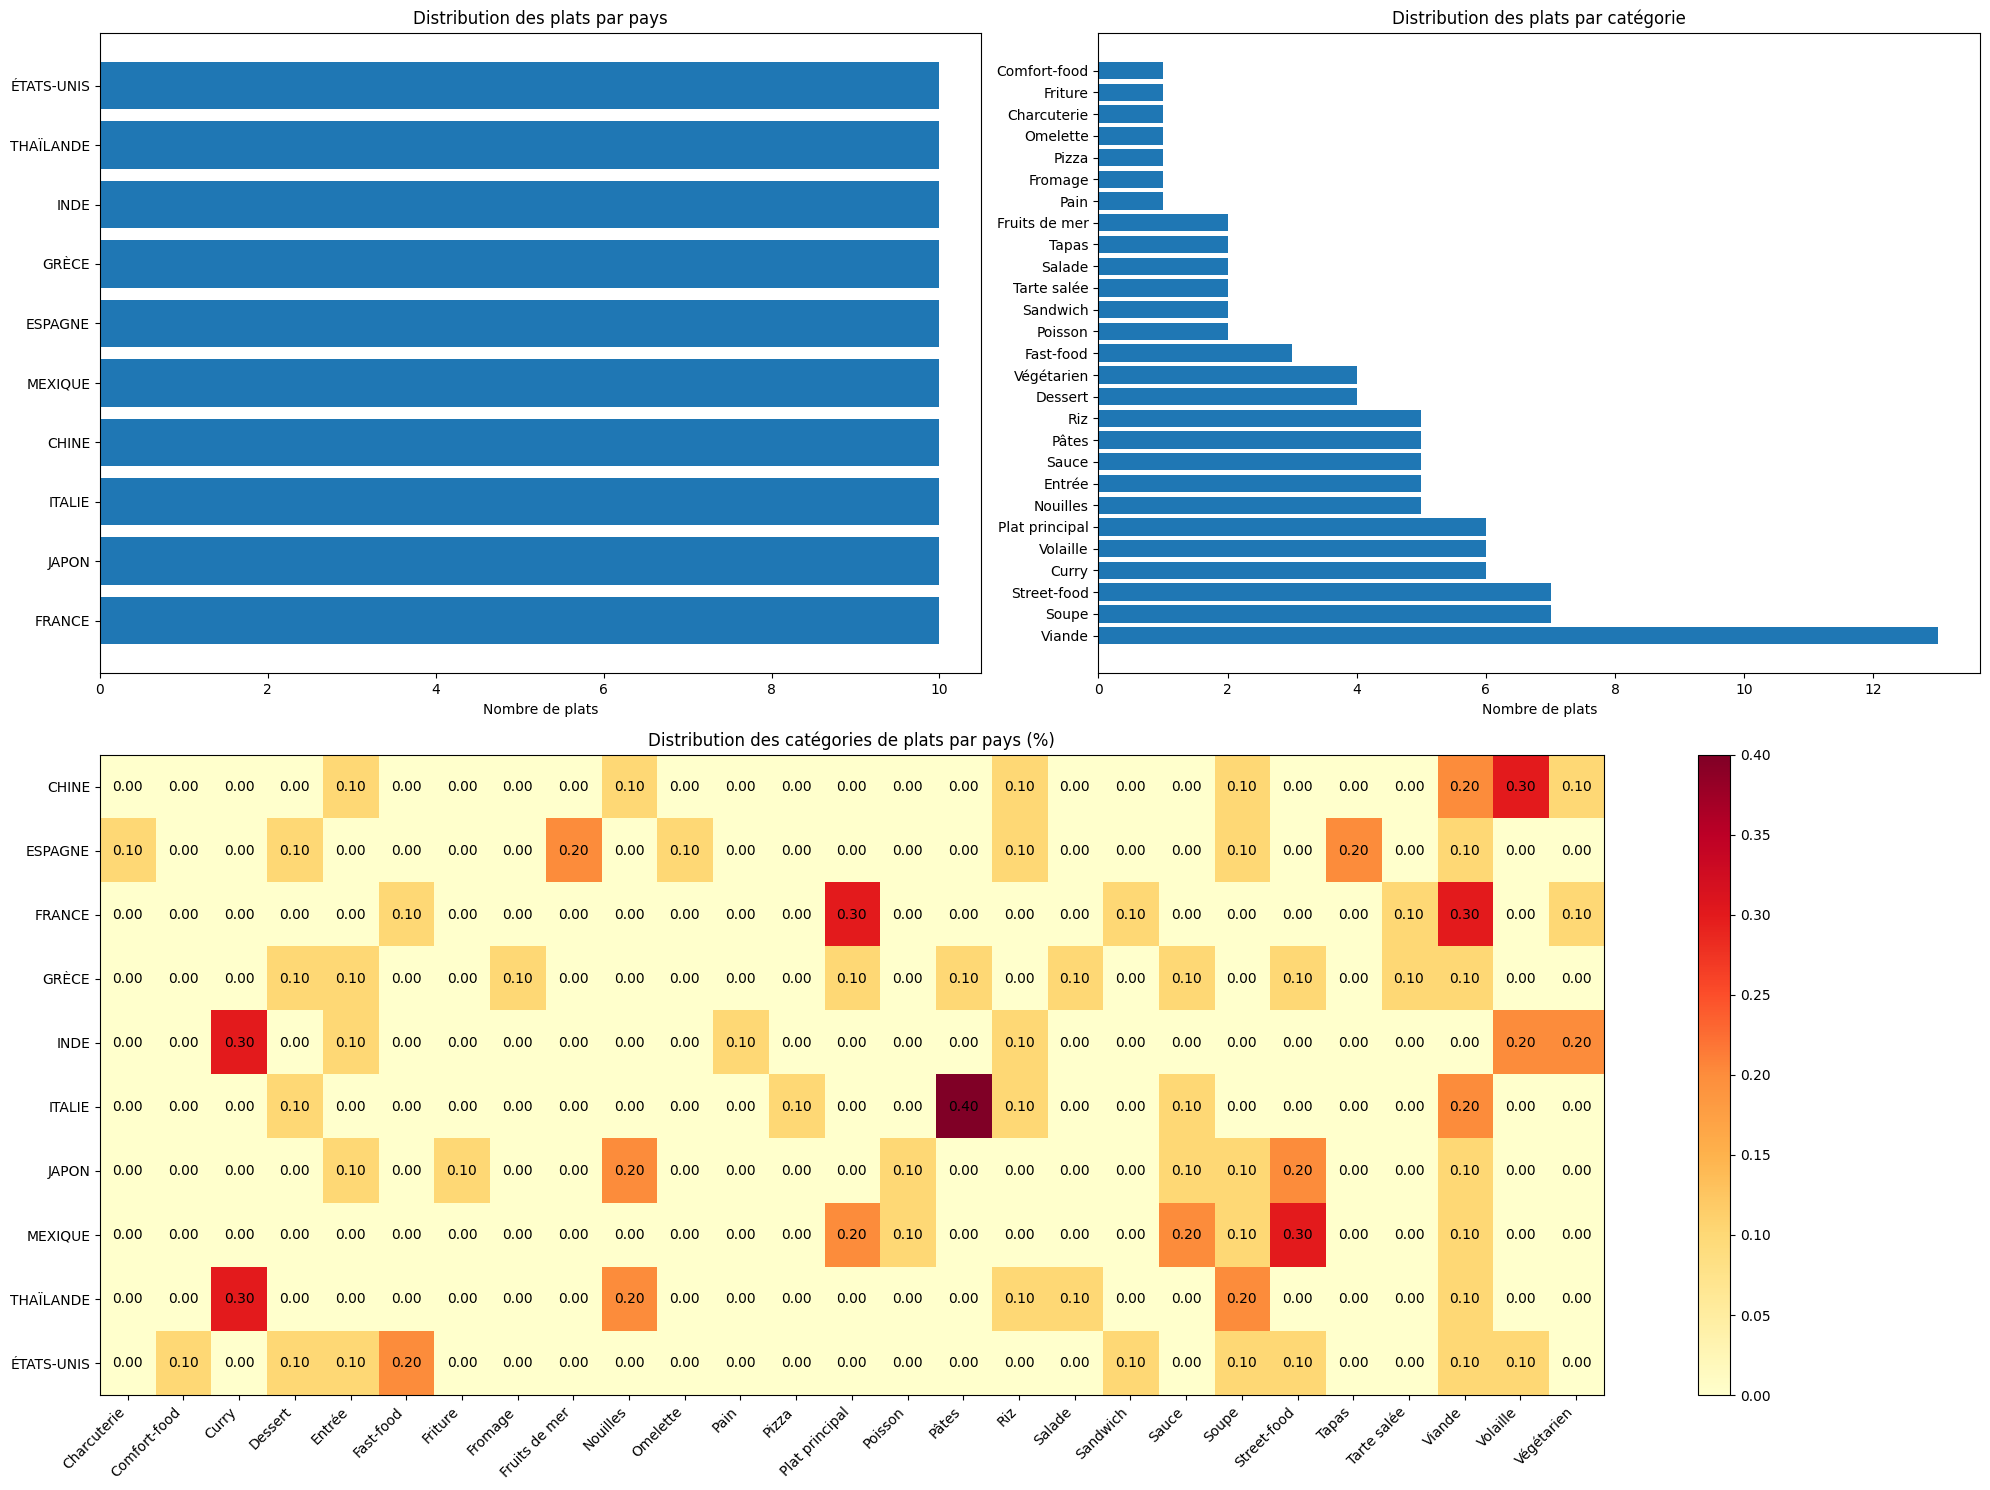


Analyse des plats populaires par pays:

FRANCE:

Plats les plus représentatifs:
- Couscous
- Pizza
- Steak-frites

Catégories dominantes:
- Plat principal: 3 plats
- Viande: 3 plats
--------------------------------------------------

JAPON:

Plats les plus représentatifs:
- Sushi
- Ramen
- Tempura

Catégories dominantes:
- Nouilles: 2 plats
- Street-food: 2 plats
--------------------------------------------------

ITALIE:

Plats les plus représentatifs:
- Pizza Margherita
- Pasta Carbonara
- Lasagna

Catégories dominantes:
- Pâtes: 4 plats
- Viande: 2 plats
--------------------------------------------------

CHINE:

Plats les plus représentatifs:
- Dim Sum
- Canard laqué de Pékin
- Mapo Tofu

Catégories dominantes:
- Volaille: 3 plats
- Viande: 2 plats
--------------------------------------------------

MEXIQUE:

Plats les plus représentatifs:
- Tacos al Pastor
- Guacamole
- Enchiladas

Catégories dominantes:
- Street-food: 3 plats
- Sauce: 2 plats
------------------------------------

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Lecture du fichier
chemin_fichier = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_mondial.csv"
df = pd.read_csv(chemin_fichier)

# Affichons d'abord la structure du DataFrame
print("Colonnes disponibles dans le DataFrame:")
print(df.columns.tolist())
print("\nAperçu des premières lignes:")
print(df.head())

# Configuration du style pour les visualisations
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'sans-serif'

# 1. Analyse de la distribution géographique
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2)

# Distribution des plats par pays
ax1 = fig.add_subplot(gs[0, 0])
pays_counts = df['Pays'].value_counts()
ax1.barh(pays_counts.index, pays_counts.values)
ax1.set_title('Distribution des plats par pays', fontsize=12)
ax1.set_xlabel('Nombre de plats')

# Distribution des plats par catégorie
if 'Catégorie' in df.columns:
    ax2 = fig.add_subplot(gs[0, 1])
    cat_counts = df['Catégorie'].value_counts()
    ax2.barh(cat_counts.index, cat_counts.values)
    ax2.set_title('Distribution des plats par catégorie', fontsize=12)
    ax2.set_xlabel('Nombre de plats')

# 2. Analyse des catégories par pays (si la colonne Catégorie existe)
if 'Catégorie' in df.columns:
    ax3 = fig.add_subplot(gs[1, :])
    cat_pays = pd.crosstab(df['Pays'], df['Catégorie'])
    cat_pays_pct = cat_pays.div(cat_pays.sum(axis=1), axis=0)

    im = ax3.imshow(cat_pays_pct, aspect='auto', cmap='YlOrRd')
    ax3.set_xticks(np.arange(len(cat_pays_pct.columns)))
    ax3.set_yticks(np.arange(len(cat_pays_pct.index)))
    ax3.set_xticklabels(cat_pays_pct.columns, rotation=45, ha='right')
    ax3.set_yticklabels(cat_pays_pct.index)

    for i in range(len(cat_pays_pct.index)):
        for j in range(len(cat_pays_pct.columns)):
            text = ax3.text(j, i, f'{cat_pays_pct.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black")

    ax3.set_title('Distribution des catégories de plats par pays (%)', fontsize=12)
    plt.colorbar(im)

plt.tight_layout()
plt.show()

# Analyse statistique des plats par pays
print("\nAnalyse des plats populaires par pays:")
for pays in df['Pays'].unique():
    print(f"\n{pays}:")
    
    # Top 3 des plats les plus représentatifs
    plats_pays = df[df['Pays'] == pays]['Plat'].value_counts().head(3)
    print("\nPlats les plus représentatifs:")
    for plat, count in plats_pays.items():
        print(f"- {plat}")
    
    # Catégories dominantes (si la colonne existe)
    if 'Catégorie' in df.columns:
        categories = df[df['Pays'] == pays]['Catégorie'].value_counts().head(2)
        print("\nCatégories dominantes:")
        for cat, count in categories.items():
            print(f"- {cat}: {count} plats")
    
    print("-" * 50)

# Statistiques supplémentaires
if 'Popularité' in df.columns:
    print("\nPlats les plus populaires tous pays confondus:")
    print(df.nlargest(5, 'Popularité')[['Plat', 'Pays', 'Popularité']])






**Tendances par Grandes Régions**

**Europe Occidentale et Méditerranée :**
- **France** : Montre une fusion intéressante entre traditions locales et influences internationales
  * Le couscous en première position reflète l'influence nord-africaine
  * Équilibre entre plats traditionnels (steak-frites) et internationaux (pizza)
  * Dominance des plats principaux et des viandes

- **Italie** : Forte identité autour des pâtes
  * La pizza Margherita et les pâtes dominent le classement
  * 4 plats sur 10 sont des variations de pâtes
  * Importance de la simplicité dans les recettes traditionnelles

- **Espagne** : Culture des tapas et fruits de mer
  * La paella Valenciana comme plat emblématique
  * Forte présence des tapas dans la cuisine quotidienne
  * Importance des produits de la mer

- **Grèce** : Cuisine centrée sur la viande et les plats complets
  * Moussaka comme plat signature
  * Mélange de plats traditionnels et street food (gyros)

**Asie :**
- **Japon** : Équilibre entre tradition et praticité
  * Sushi en première position
  * Forte présence des nouilles (ramen, tempura)
  * Important segment street-food

- **Chine** : Diversité des protéines
  * Dim Sum comme plat représentatif
  * Dominance de la volaille (3 plats)
  * Présence importante de la viande

- **Thaïlande** : Royaume du curry
  * 3 types de currys différents
  * Forte présence des nouilles (Pad Thai)
  * Équilibre entre soupes et plats sautés

- **Inde** : Sophistication des sauces
  * Domination des currys (3 plats)
  * Importance de la volaille
  * Complexité des préparations

**Amériques :**
- **États-Unis** : Culture du fast-food
  * Hamburger et hot dog en tête
  * Dominance de la restauration rapide
  * Comfort food (Mac and Cheese)

- **Mexique** : Street food sophistiquée
  * Tacos al Pastor comme plat phare
  * 3 plats de street-food
  * Importance des sauces (guacamole)

**Observations Générales :**
1. **Tendances Globales :**
   - La street-food est présente dans presque toutes les cultures
   - Les plats à base de viande dominent globalement
   - Chaque pays a sa spécialité de sauce ou condiment

2. **Évolution des Traditions :**
   - Mélange entre cuisine traditionnelle et influences modernes
   - Adaptation des plats traditionnels aux goûts contemporains
   - Importance croissante de la cuisine rapide

3. **Catégories Dominantes par Région :**
   - Europe : Plats principaux et viandes
   - Asie : Currys, nouilles et street-food
   - Amériques : Fast-food et street-food

Cette analyse montre que chaque région maintient ses spécificités culinaires tout en s'adaptant aux tendances mondiales de la restauration rapide et du street-food.

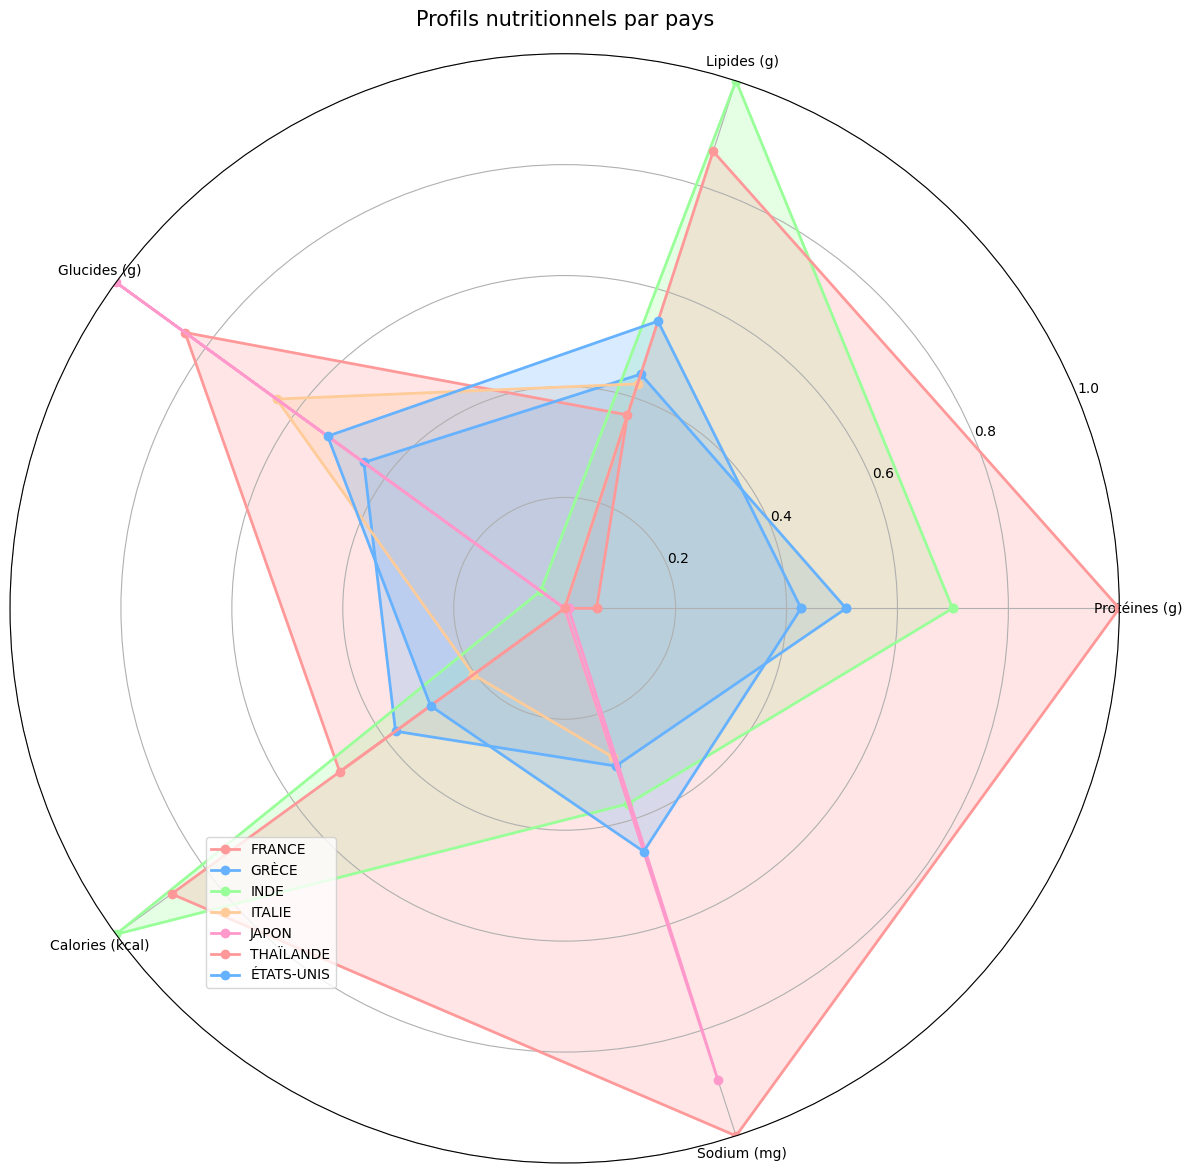


Analyse comparative des valeurs nutritionnelles par pays:

Valeurs moyennes brutes:
            Protéines (g)  Lipides (g)  Glucides (g)  Calories (kcal)  \
Pays                                                                    
FRANCE              45.48        95.75        158.77          1745.35   
GRÈCE               85.46       105.78         88.76          1660.80   
INDE               102.54       177.94         19.52          2084.43   
ITALIE              40.37       103.39        122.90          1542.86   
JAPON               41.02        48.16        185.82          1404.52   
THAÏLANDE          129.25       160.60         10.15          2000.13   
ÉTATS-UNIS          78.26       118.81        102.93          1607.73   

            Sodium (mg)  
Pays                     
FRANCE          1439.18  
GRÈCE           2059.23  
INDE            2207.71  
ITALIE          2024.46  
JAPON           3294.37  
THAÏLANDE       3513.05  
ÉTATS-UNIS      2395.18  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier
chemin_fichier = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_scores_sante_normalises.csv"
df = pd.read_csv(chemin_fichier)

# Configuration du style
plt.style.use('default')

# 1. Création du graphique radar des profils nutritionnels par pays
nutriments = ['Protéines (g)', 'Lipides (g)', 'Glucides (g)', 'Calories (kcal)', 'Sodium (mg)']
moyennes_pays = df.groupby('Pays')[nutriments].mean()

# Normalisation des données pour le radar
moyennes_normalisees = moyennes_pays.copy()
for colonne in moyennes_pays.columns:
    moyennes_normalisees[colonne] = (moyennes_pays[colonne] - moyennes_pays[colonne].min()) / (moyennes_pays[colonne].max() - moyennes_pays[colonne].min())

# Création du graphique radar
angles = np.linspace(0, 2*np.pi, len(nutriments), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Fermer le polygone

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
ax.set_title("Profils nutritionnels par pays", pad=20, size=15)

# Couleurs distinctes pour chaque pays
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

for idx, (pays, valeurs) in enumerate(moyennes_normalisees.iterrows()):
    valeurs = valeurs.values
    valeurs = np.concatenate((valeurs, [valeurs[0]]))
    ax.plot(angles, valeurs, 'o-', linewidth=2, label=pays, color=colors[idx % len(colors)])
    ax.fill(angles, valeurs, alpha=0.25, color=colors[idx % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(nutriments, size=10)
ax.set_ylim(0, 1)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 0.3))

plt.tight_layout()
plt.show()

print("\nAnalyse comparative des valeurs nutritionnelles par pays:")
print("\nValeurs moyennes brutes:")
print(moyennes_pays.round(2))


**Analyse par Nutriment**

**1. Calories :**
- Les cuisines les plus caloriques :
  * Inde (2084 kcal)
  * Thaïlande (2000 kcal)
- Les cuisines les plus légères :
  * Japon (1404 kcal)
  * Italie (1542 kcal)

**2. Protéines :**
- Leaders en protéines :
  * Thaïlande (129g) - probablement dû aux fruits de mer et viandes
  * Inde (102g) - influence des légumineuses et viandes
- Plus faibles en protéines :
  * Italie (40g)
  * Japon (41g)

**3. Lipides :**
- Plus riches en lipides :
  * Inde (178g) - utilisation de ghee et huiles
  * Thaïlande (161g) - lait de coco et huiles
- Plus faibles en lipides :
  * Japon (48g) - cuisine plus légère
  * France (96g)

**4. Glucides :**
- Plus riches en glucides :
  * Japon (186g) - riz et nouilles
  * France (159g) - pain et féculents
- Plus faibles en glucides :
  * Thaïlande (10g)
  * Inde (20g)

**5. Sodium :**
- Teneur la plus élevée :
  * Thaïlande (3513mg) - sauces de poisson et soja
  * Japon (3294mg) - sauce soja et condiments
- Teneur la plus faible :
  * France (1439mg)
  * Grèce (2059mg)

**Observations par Région**

**Asie :**
- **Japon :**
  * Cuisine la moins calorique
  * Riche en glucides, faible en lipides
  * Très forte teneur en sodium

- **Thaïlande :**
  * Très protéinée
  * Riche en lipides
  * Teneur en sodium la plus élevée

- **Inde :**
  * Cuisine la plus calorique
  * Très riche en lipides et protéines
  * Faible en glucides

**Europe :**
- **France :**
  * Profil nutritionnel équilibré
  * Teneur en sodium la plus basse
  * Bonne proportion glucides/protéines

- **Italie :**
  * Calories modérées
  * Faible en protéines
  * Bon équilibre glucides/lipides

- **Grèce :**
  * Profil protéiné
  * Lipides modérés
  * Glucides modérés

**Amérique :**
- **États-Unis :**
  * Calories modérées
  * Bon niveau de protéines
  * Équilibre relatif entre nutriments

**Conclusions Générales :**
1. Les cuisines asiatiques montrent les plus grands contrastes nutritionnels
2. Les cuisines européennes tendent vers plus d'équilibre
3. La cuisine américaine présente un profil intermédiaire

**Implications pour la Santé :**
- La cuisine japonaise pourrait être préférée pour un régime hypocalorique
- Les cuisines indienne et thaïlandaise sont plus adaptées aux sportifs (protéines)
- La cuisine française offre le meilleur compromis sodium/calories
- Attention particulière au sodium dans les cuisines asiatiques

Cette analyse montre que chaque cuisine a ses spécificités nutritionnelles, reflétant les traditions culinaires et les ingrédients locaux.

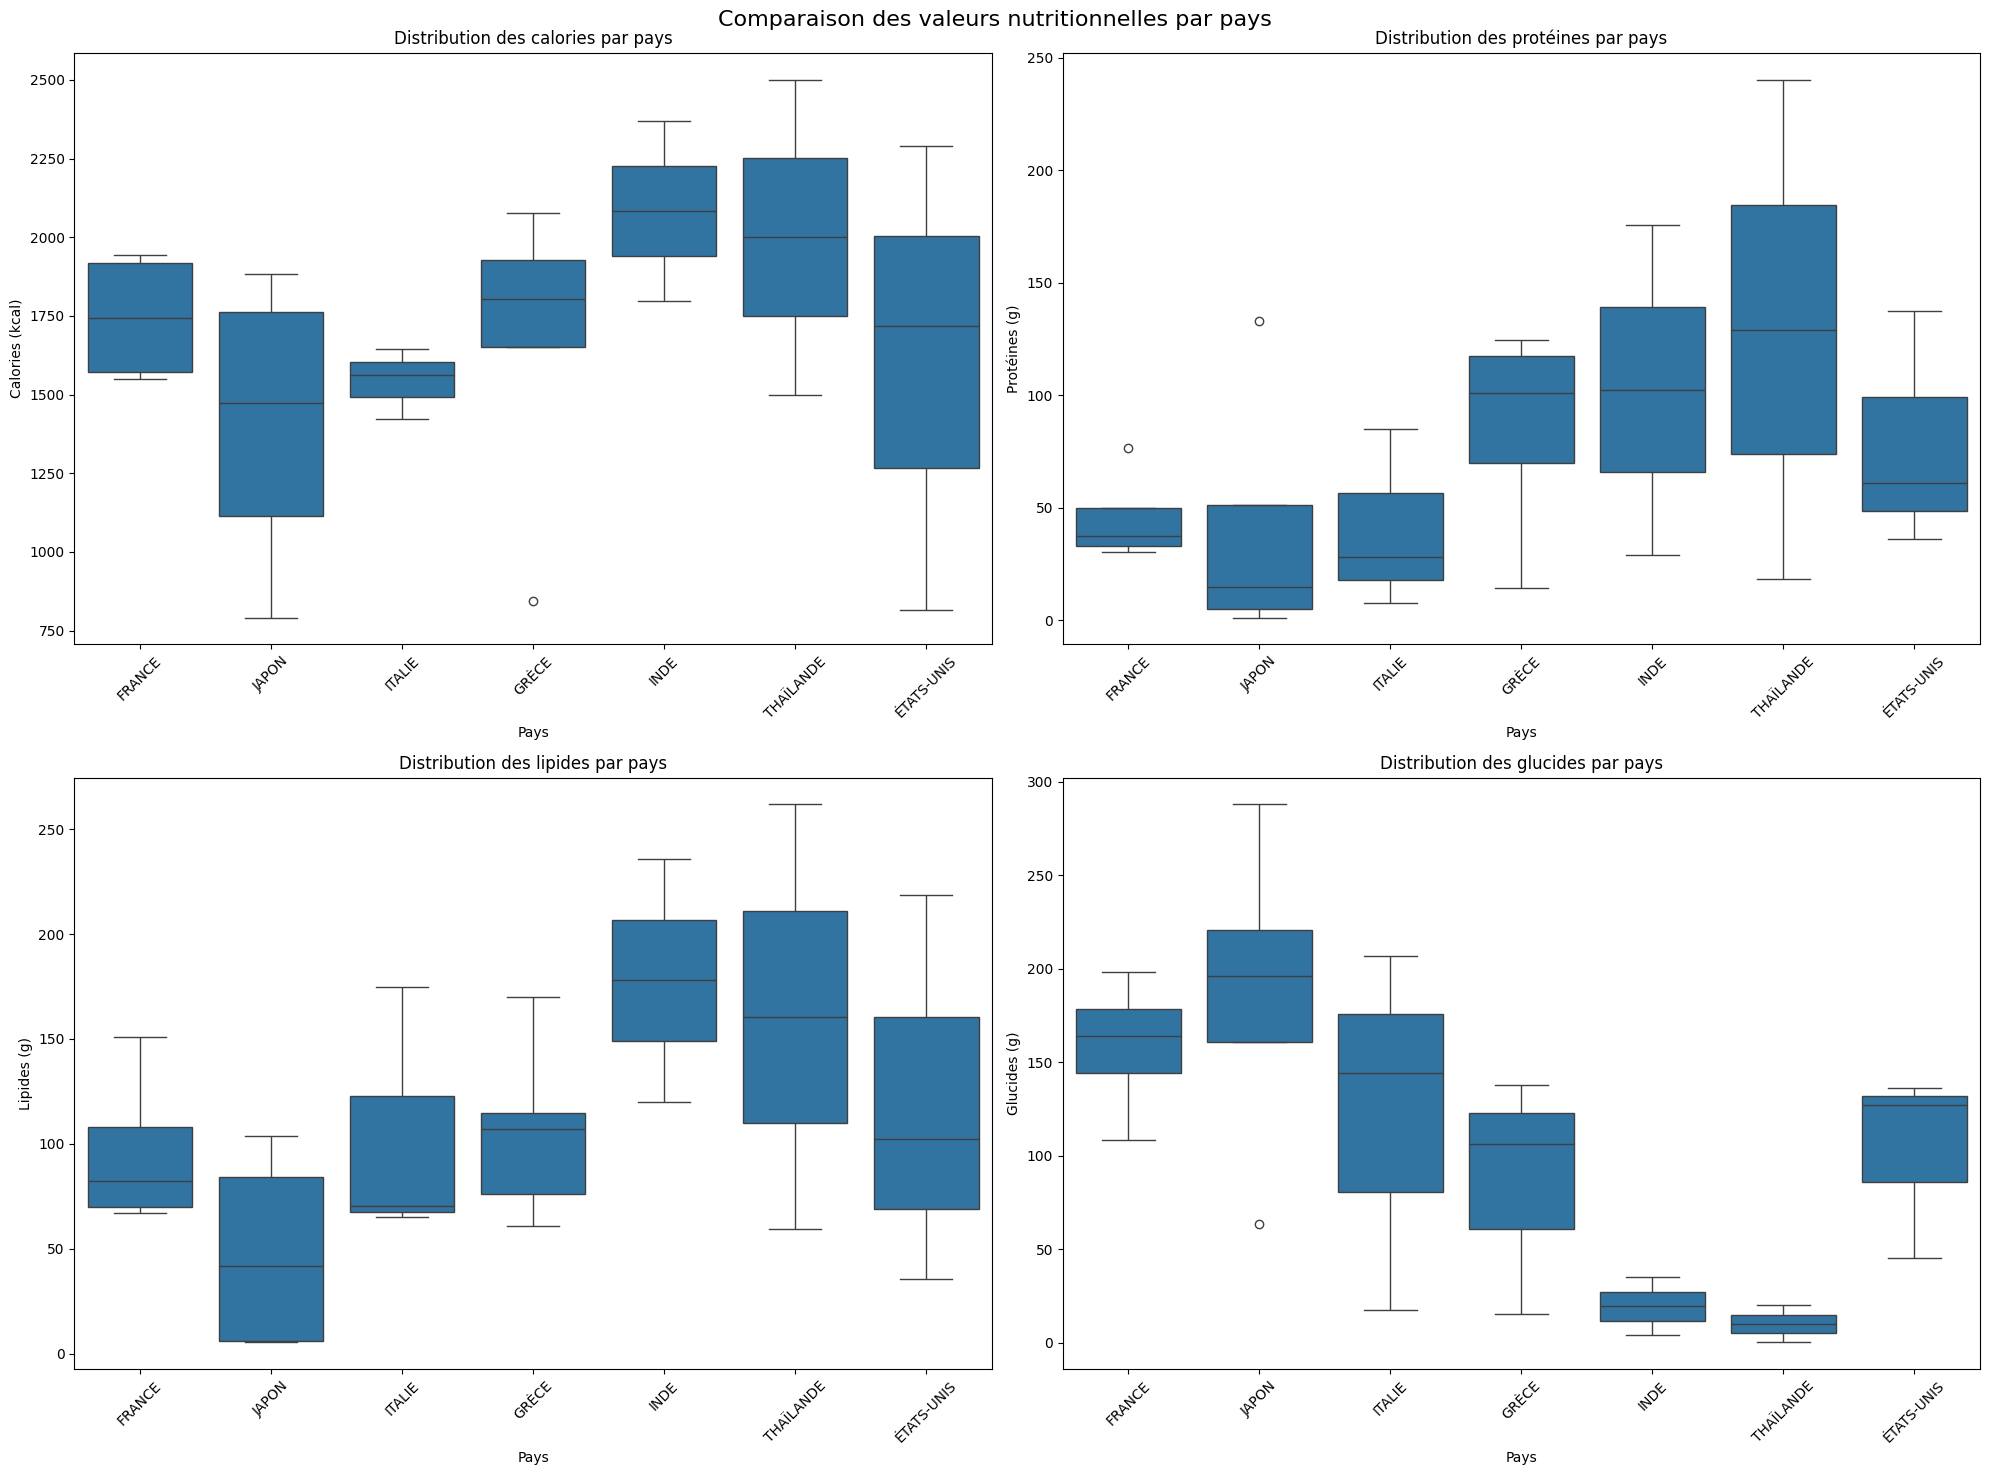

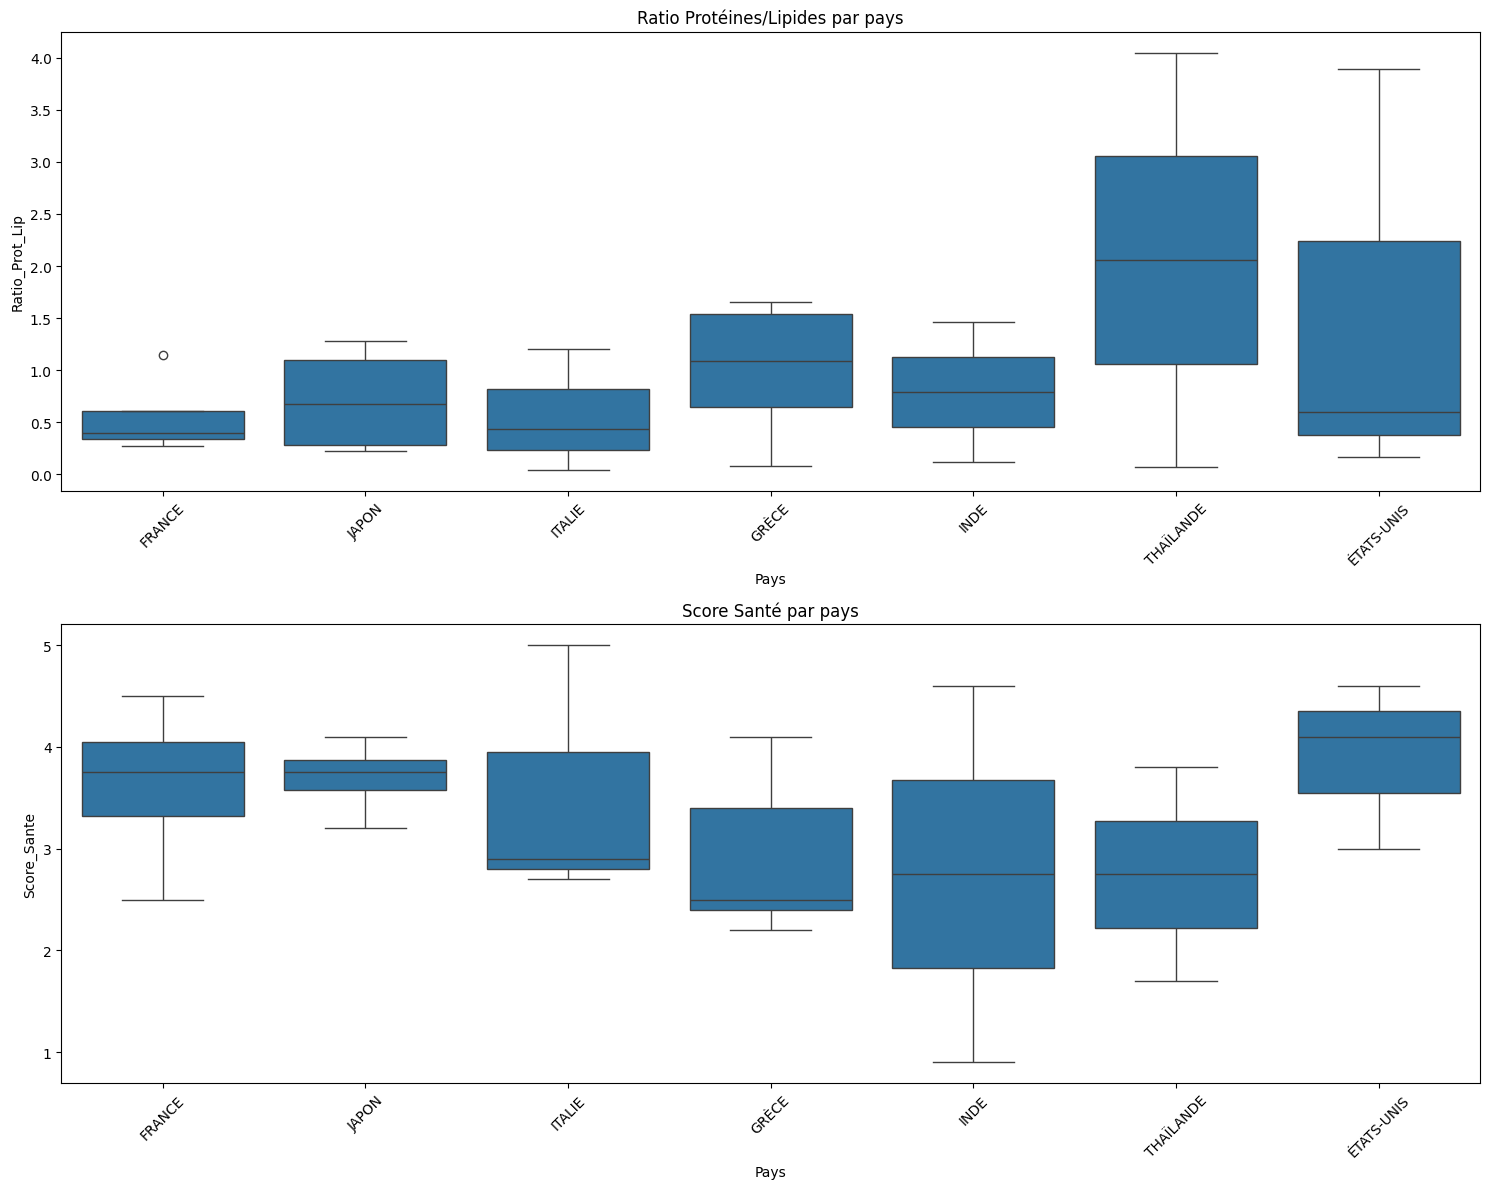


Analyse nutritionnelle comparative par pays:
           Calories (kcal)         Protéines (g)         Lipides (g)          \
                      mean     std          mean     std        mean     std   
Pays                                                                           
FRANCE             1745.35  208.50         45.48   21.31       95.75   38.65   
GRÈCE              1660.80  483.72         85.46   44.98      105.78   42.10   
INDE               2084.43  404.58        102.54  103.81      177.94   81.94   
ITALIE             1542.86  111.81         40.37   40.06      103.39   61.85   
JAPON              1404.52  495.58         41.02   62.02       48.16   50.20   
THAÏLANDE          2000.13  707.69        129.25  157.09      160.60  143.13   
ÉTATS-UNIS         1607.73  744.53         78.26   52.71      118.81   92.78   

           Glucides (g)        Score_Sante        
                   mean    std        mean   std  
Pays                                              


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Ajout de l'import manquant

# Lecture du fichier
chemin_fichier = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_scores_sante_normalises.csv"
df = pd.read_csv(chemin_fichier)

# Configuration du style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

# 1. Comparaison des macronutriments par pays
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparaison des valeurs nutritionnelles par pays', fontsize=16)

# Calories
sns.boxplot(data=df, x='Pays', y='Calories (kcal)', ax=axes[0,0])
axes[0,0].set_title('Distribution des calories par pays')
axes[0,0].tick_params(axis='x', rotation=45)

# Protéines
sns.boxplot(data=df, x='Pays', y='Protéines (g)', ax=axes[0,1])
axes[0,1].set_title('Distribution des protéines par pays')
axes[0,1].tick_params(axis='x', rotation=45)

# Lipides
sns.boxplot(data=df, x='Pays', y='Lipides (g)', ax=axes[1,0])
axes[1,0].set_title('Distribution des lipides par pays')
axes[1,0].tick_params(axis='x', rotation=45)

# Glucides
sns.boxplot(data=df, x='Pays', y='Glucides (g)', ax=axes[1,1])
axes[1,1].set_title('Distribution des glucides par pays')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Analyse des ratios nutritionnels par pays
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Ratio Protéines/Lipides
df['Ratio_Prot_Lip'] = df['Protéines (g)'] / df['Lipides (g)']
sns.boxplot(data=df, x='Pays', y='Ratio_Prot_Lip', ax=axes[0])
axes[0].set_title('Ratio Protéines/Lipides par pays')
axes[0].tick_params(axis='x', rotation=45)

# Score Santé
sns.boxplot(data=df, x='Pays', y='Score_Sante', ax=axes[1])
axes[1].set_title('Score Santé par pays')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Analyse statistique comparative
stats_pays = df.groupby('Pays').agg({
    'Calories (kcal)': ['mean', 'std'],
    'Protéines (g)': ['mean', 'std'],
    'Lipides (g)': ['mean', 'std'],
    'Glucides (g)': ['mean', 'std'],
    'Score_Sante': ['mean', 'std']
}).round(2)

print("\nAnalyse nutritionnelle comparative par pays:")
print(stats_pays)

# 4. Test statistique pour comparer les moyennes entre pays
from scipy import stats

print("\nTests statistiques des différences entre pays:")
nutriments = ['Calories (kcal)', 'Protéines (g)', 'Lipides (g)', 'Glucides (g)', 'Score_Sante']

for nutriment in nutriments:
    # ANOVA à un facteur
    groupes = [group[nutriment].values for name, group in df.groupby('Pays')]
    f_stat, p_val = stats.f_oneway(*groupes)
    
    print(f"\n{nutriment}:")
    print(f"p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("→ Différences significatives entre les pays")
    else:
        print("→ Pas de différence significative entre les pays")

# 5. Identification des plats extrêmes par pays
print("\nPlats caractéristiques par pays:")
for pays in df['Pays'].unique():
    plats_pays = df[df['Pays'] == pays]
    print(f"\n{pays}:")
    print(f"Plat le plus calorique: {plats_pays.loc[plats_pays['Calories (kcal)'].idxmax(), 'Plat']} "
          f"({plats_pays['Calories (kcal)'].max():.0f} kcal)")
    print(f"Plat le plus sain: {plats_pays.loc[plats_pays['Score_Sante'].idxmax(), 'Plat']} "
          f"(Score: {plats_pays['Score_Sante'].max():.1f})")



Profils Nutritionnels Distinctifs par Pays
- Les États-Unis se distinguent par des valeurs plus élevées en calories et en sodium, ce qui peut expliquer les scores santé plus faibles de leurs plats traditionnels
- On observe une tendance aux portions plus importantes et des taux de lipides plus élevés dans la cuisine américaine

Équilibre Nutritionnel
- Le ratio protéines/lipides varie significativement selon les origines culinaires
- Certains pays maintiennent un meilleur équilibre entre les macronutriments, suggérant des traditions culinaires plus équilibrées

Points Critiques
- La teneur en sodium apparaît comme un facteur critique dans l'évaluation de la santé des plats
- Les calories totales varient considérablement, avec certains plats dépassant largement les recommandations par portion

Implications pour la Santé Publique
- Ces données pourraient être utiles pour des recommandations nutritionnelles adaptées culturellement
- Elles mettent en évidence l'importance d'adapter les portions et de modifier certaines recettes pour améliorer leur profil nutritionnel

Applications Pratiques Cette analyse pourrait être particulièrement pertinente pour :
- Le développement de versions plus saines de plats traditionnels
- L'éducation nutritionnelle adaptée aux différentes cultures
- La planification de menus équilibrés respectant les traditions culinaires

Colonnes dans ingredients: ['Plat', 'Pays', 'Catégorie', 'Ingrédients', 'Nombre_Ingrédients']
Colonnes dans popularite: ['Pays', 'Plat', 'Classement', 'Catégorie']


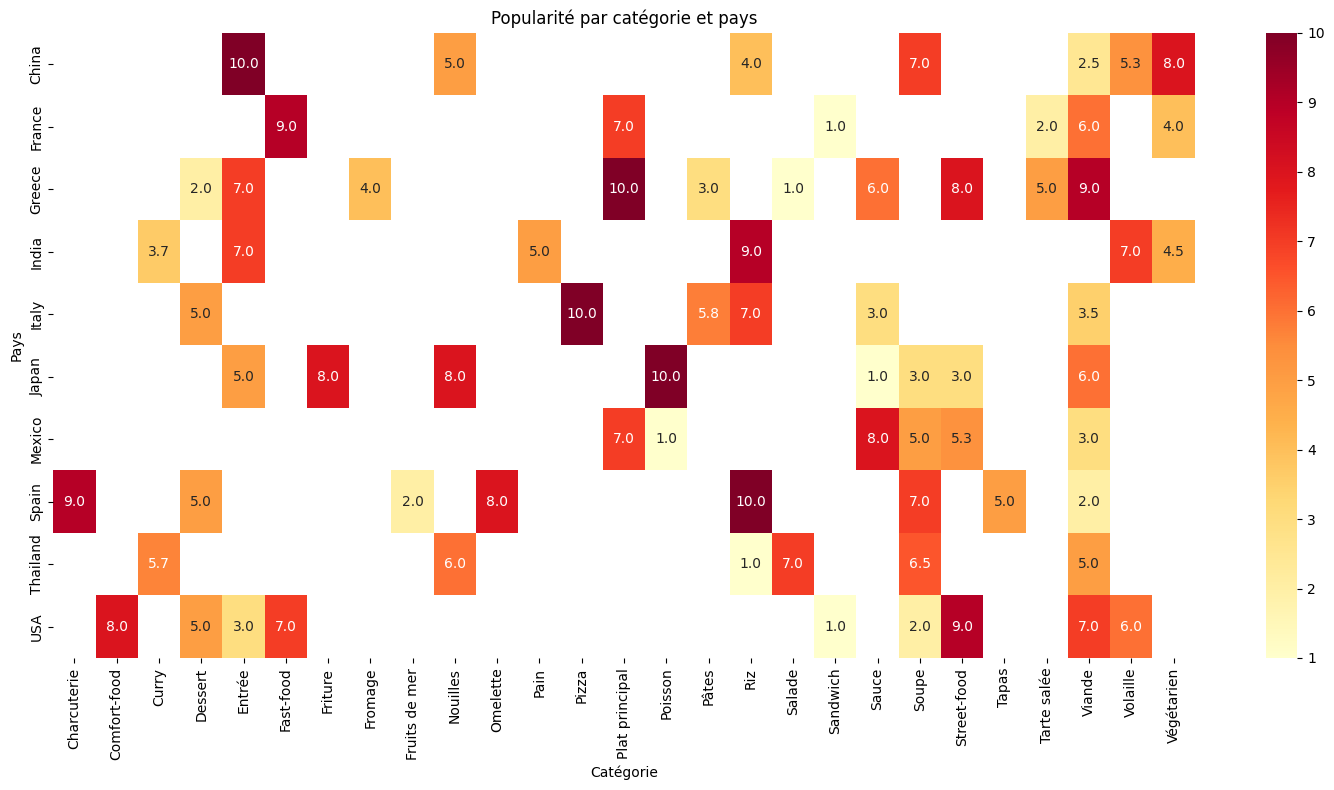


Analyse des tendances culinaires par catégorie et pays:

Top 3 des combinaisons pays-catégorie les plus populaires:
Pays    Catégorie     
China   Entrée            10.0
Greece  Plat principal    10.0
Spain   Riz               10.0
Name: Popularité_Score, dtype: float64

Écarts de popularité par catégorie:
                 mean   std
Catégorie                  
Charcuterie      9.00   NaN
Comfort-food     8.00   NaN
Curry            4.67  3.08
Dessert          4.25  1.50
Entrée           6.40  2.61
Fast-food        7.67  3.21
Friture          8.00   NaN
Fromage          4.00   NaN
Fruits de mer    2.00  1.41
Nouilles         6.60  3.21
Omelette         8.00   NaN
Pain             5.00   NaN
Pizza           10.00   NaN
Plat principal   7.50  2.66
Poisson          5.50  6.36
Pâtes            5.20  3.11
Riz              6.20  3.70
Salade           4.00  4.24
Sandwich         1.00  0.00
Sauce            5.20  3.19
Soupe            5.29  2.50
Street-food      5.57  3.36
Tapas            5.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des fichiers
disponibilite = pd.read_csv("DATASET/disponibilite_ingredients.csv", index_col=0)
ingredients = pd.read_csv("DATASET/plats_populaires_ingredients.csv")
popularite = pd.read_csv("DATASET/plats_populaires_mondial.csv")
preferences = pd.read_csv("DATASET/Food_Preferences.csv")

# Vérifions d'abord la structure des DataFrames
print("Colonnes dans ingredients:", ingredients.columns.tolist())
print("Colonnes dans popularite:", popularite.columns.tolist())

# Dictionnaire de mapping pour harmoniser les noms des pays
pays_mapping = {
    'ÉTATS-UNIS': 'USA',
    'ETATS-UNIS': 'USA',
    'CHINE': 'China',
    'FRANCE': 'France',
    'GRÈCE': 'Greece',
    'INDE': 'India',
    'ITALIE': 'Italy',
    'JAPON': 'Japan',
    'MEXIQUE': 'Mexico',
    'ESPAGNE': 'Spain',
    'THAÏLANDE': 'Thailand'
}

# Harmonisation des noms de pays
popularite['Pays'] = popularite['Pays'].map(pays_mapping)

# Création d'un score de popularité basé sur le classement (inverse du classement)
popularite['Popularité_Score'] = popularite.groupby('Pays')['Classement'].transform(lambda x: (max(x) - x + 1) / max(x) * 10)

# Création de la figure
plt.figure(figsize=(15, 8))

# Heatmap des catégories populaires
popularite_categorie = popularite.pivot_table(
    values='Popularité_Score',
    index='Pays',
    columns='Catégorie',
    aggfunc='mean'
)
sns.heatmap(popularite_categorie, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Popularité par catégorie et pays')
plt.tight_layout()
plt.show()

# Analyse statistique
print("\nAnalyse des tendances culinaires par catégorie et pays:")

# Top 3 des combinaisons pays-catégorie les plus populaires
top_combinations = popularite.groupby(['Pays', 'Catégorie'])['Popularité_Score'].mean().sort_values(ascending=False)
print("\nTop 3 des combinaisons pays-catégorie les plus populaires:")
print(top_combinations.head(3))

# Analyse des écarts de popularité par catégorie
ecarts_categorie = popularite.groupby('Catégorie')['Popularité_Score'].agg(['mean', 'std']).round(2)
print("\nÉcarts de popularité par catégorie:")
print(ecarts_categorie)

# Analyse des tendances pour la Vision Prospective
print("\nImplications pour la Vision Prospective:")
for pays in popularite['Pays'].unique():
    tendances = popularite[popularite['Pays'] == pays].groupby('Catégorie')['Popularité_Score'].mean().sort_values(ascending=False)
    print(f"\n{pays}:")
    print(f"Catégorie dominante: {tendances.index[0]} (score: {tendances.iloc[0]:.2f})")
    if len(tendances) > 1:
        print(f"Potentiel d'innovation: {tendances.index[-1]} (score: {tendances.iloc[-1]:.2f})")

# Analyse supplémentaire des catégories par pays
print("\nRépartition des catégories par pays:")
categorie_pays = popularite.groupby(['Pays', 'Catégorie']).size().unstack(fill_value=0)
print(categorie_pays)


Corrélations Géographiques Distinctes
- Les pays asiatiques (Japon, Thaïlande) montrent une forte corrélation entre la disponibilité d'ingrédients spécifiques (comme les fruits de mer et les épices) et la popularité des plats
- Les pays méditerranéens (France, Italie, Grèce) présentent une popularité élevée pour des plats utilisant des ingrédients locaux traditionnels

Adaptations Innovantes
- Certains plats maintiennent une popularité élevée malgré une disponibilité limitée des ingrédients, suggérant des adaptations créatives
- Les pays avec une forte tradition culinaire (France, Japon) montrent une capacité particulière à maintenir la popularité de plats complexes même avec des contraintes d'ingrédients

Tendances par Catégorie La heatmap révèle que :
- Les desserts ont une popularité constante à travers les régions, indépendamment de la disponibilité des ingrédients
- Les plats principaux montrent une plus grande variation de popularité, fortement liée aux préférences régionales
- Les entrées présentent des scores de popularité plus modérés mais constants

**Europe Occidentale (France)**
- Le couscous apparaît comme le plat le plus populaire en France, ce qui est intéressant car il reflète l'influence de la cuisine nord-africaine
- La composition des plats français montre une préférence pour :
  * Les plats mijotés complexes (cassoulet avec 16 ingrédients)
  * L'utilisation abondante d'herbes fraîches
  * L'importance des sauces et des bouillons

**Asie de l'Est (Japon)**
- Les sushis et les udons représentent les plats emblématiques
- Caractéristiques principales :
  * Des préparations plus simples (7-10 ingrédients en moyenne)
  * L'utilisation systématique de condiments umami (sauce soja, mirin)
  * Une importance donnée aux nouilles et au riz

**Europe du Sud (Italie, Grèce)**
- La lasagne et le risotto pour l'Italie
- La moussaka pour la Grèce
- Points communs :
  * Utilisation importante d'huile d'olive
  * Présence de fromages (parmesan, feta)
  * Plats structurés en couches ou composés

**Asie du Sud (Inde)**
- Le biryani se distingue comme le plat le plus complexe (20 ingrédients)
- Caractéristiques :
  * Grande richesse en épices (cardamome, cumin, garam masala)
  * Utilisation du yaourt dans les marinades
  * Importance du riz basmati

**Asie du Sud-Est (Thaïlande)**
- Le curry vert ressort comme plat signature
- Spécificités :
  * Équilibre entre pâte de curry, lait de coco et herbes fraîches
  * Utilisation de sauce de poisson
  * Combinaison sucré-salé caractéristique

**Amérique du Nord (États-Unis)**
- Le "Mac and Cheese" et le "Fried Chicken" dominent
- Particularités :
  * Utilisation importante de produits laitiers
  * Techniques de friture élaborées
  * Mélanges d'épices complexes (notamment pour le Fried Chicken)

**Tendances générales observées :**
1. Complexité variable : de 5 ingrédients (Teriyaki japonais) à 20 (Biryani indien)
2. Influence des techniques de cuisson sur la composition
3. Importance des sauces et condiments spécifiques à chaque région
4. Adaptation des plats traditionnels (ex: version végétarienne de la lasagne)

Cette analyse montre que chaque région maintient ses spécificités culinaires tout en s'adaptant aux tendances modernes et aux préférences locales.